# Notebook d'analyses


## Library

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Connexion au drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Ressources : 


### Data population mondiale 1960-2018


In [0]:
#Database Population Mondial 1960-2018
downloaded = drive.CreateFile({'id': '1WRAnnYVo4JR-_10DhWNIDhE1wKUXiG2q'})
downloaded.GetContentFile('API_SP.POP.TOTL_DS2_fr_csv_v2_937567.csv')
pop = pd.read_csv("API_SP.POP.TOTL_DS2_fr_csv_v2_937567.csv", skiprows = [0, 3], header = 1) 

In [0]:
pop.head(50)

In [0]:
pop['Country Name'].unique()

In [0]:
pop.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2016                2
2017                2
2018                2
2019              264
Unnamed: 64       264
Length: 65, dtype: int64

In [0]:
popMonde = pd.DataFrame(pop[pop['Country Name'] == 'Monde'])

popMonde = popMonde.iloc[:, 4:-2]
popMonde['YEAR'] = 'Population Totale'
popMonde.set_index('YEAR', inplace=True)

popMonde = popMonde.T

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1960 to 2018
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population Totale  59 non-null     float64
dtypes: float64(1)
memory usage: 944.0+ bytes


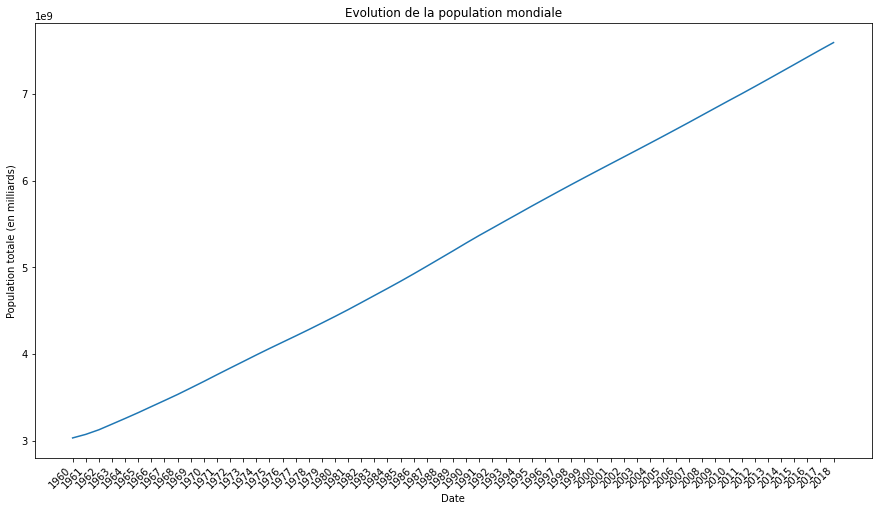

In [0]:
plt.figure(figsize=(15, 8))
plt.plot(popMonde.index, popMonde['Population Totale'])
plt.title("Evolution de la population mondiale")
plt.xlabel('Date')
plt.ylabel('Population totale (en milliards)')
plt.xticks(rotation = 45, ha = "right")

plt.show()

### Données FAO (ONU): 

Source : http://www.fao.org/faostat/en/#data/OA






### Données CO2 

#### CO2 dans l'athmosphère (PPM)

In [0]:
## PPM 
downloaded = drive.CreateFile({'id': '1UoLzlwDYNl3Y0Pk1ES-7e18TrSswhD20'})
downloaded.GetContentFile('co2-ppm-daily.csv')
dataCO2ppm = pd.read_csv('co2-ppm-daily.csv')
dataCO2ppm['date'] = pd.to_datetime(dataCO2ppm['date'])

In [0]:
dataCO2ppm.head()

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [0]:
dataCO2ppm['YEAR'] = pd.DatetimeIndex(dataCO2ppm['date']).year
dataCO2ppm['MONTH'] = pd.DatetimeIndex(dataCO2ppm['date']).month
dataCO2ppm = dataCO2ppm.set_index('date')
dataCO2ppm

,value,YEAR
date,,
1958-03-30,316.16,1958
1958-03-31,316.40,1958
1958-04-02,317.67,1958
1958-04-03,317.76,1958
1958-04-04,317.09,1958
...,...,...
2020-04-09,417.85,2020
2020-04-10,416.67,2020
2020-04-11,416.33,2020


In [0]:
dataCO2 = dataCO2ppm.groupby('YEAR').mean()
dataCO2 = dataCO2.dropna(axis=0)

In [0]:
dataCO2.head(20)

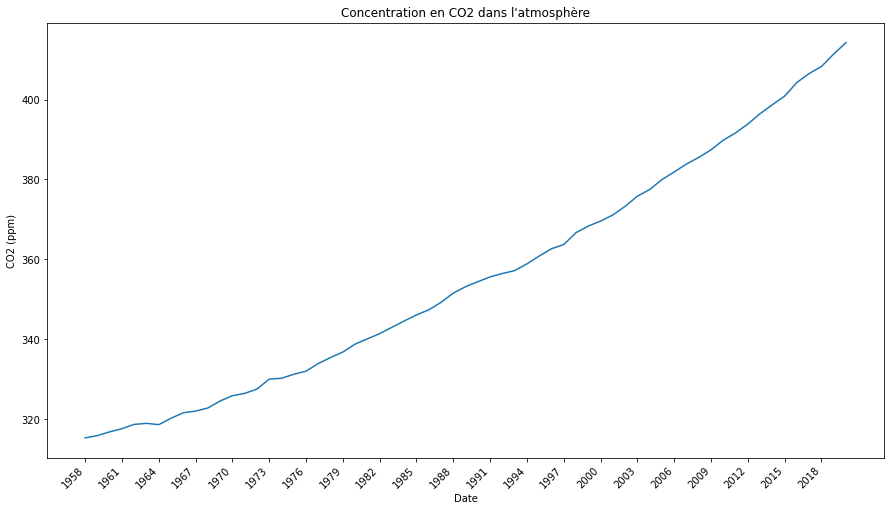

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))
plt.plot(dataCO2.index, dataCO2['value'])
plt.title("Concentration en CO2 dans l'atmosphère")
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.xticks(np.arange(1958, 2020, step=3), rotation = 45, ha = "right")

plt.show()

#### Emission de CO2 dans le monde

In [0]:
## Emissions
downloaded = drive.CreateFile({'id': '1puvKwBbcCz5FmckzUNw0ZQX44aG9l9wj'})
downloaded.GetContentFile('Emission_CO2(kt).csv')
dataCO2emissions = pd.read_csv('Emission_CO2(kt).csv')

In [0]:
dataCO2emissions.head(10)

### Temperatures

#### Wolrd temperature anomalies



Source : https://datahub.io/core/global-temp
___
Name: ***GISTEMP*** Global Land-Ocean Temperature Index

Web: http://data.giss.nasa.gov/gistemp

-- 

Name: Global component of Climate at a Glance (***GCAG***)

Web: http://www.ncdc.noaa.gov/cag/data-info/global
___

#### Global temperature

Source : https://data.world/data-society/global-climate-change-data 

In [0]:
# Import GlobalLandTemperatures.csv
downloaded = drive.CreateFile({'id': '1d7B5tzg_pmQ453Ocoop41DP475D4Wsbx'})
downloaded.GetContentFile('GlobalLandTemperatures.csv')
dataGlobalTemp = pd.read_csv('GlobalLandTemperatures.csv')

In [0]:
dataGlobalTemp['dt'] = pd.to_datetime(dataGlobalTemp['dt'])
#dataGlobalTemp.set_index('dt', inplace = True)

In [0]:
dataGlobalTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

In [0]:
dataGlobalTemp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,YEAR,MONTH
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,3192.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000,6.500000
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,76.799074,3.452593
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000,1.000000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1816.000000,3.750000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1882.500000,6.500000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1949.000000,9.250000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000,12.000000


In [0]:
dataGlobalTemp.tail(10)

In [0]:
dataGlobalTemp['YEAR'] = pd.DatetimeIndex(dataGlobalTemp['dt']).year
dataGlobalTemp['MONTH'] = pd.DatetimeIndex(dataGlobalTemp['dt']).month
dataGlobalTemp = dataGlobalTemp.set_index('dt')

NameError: ignored

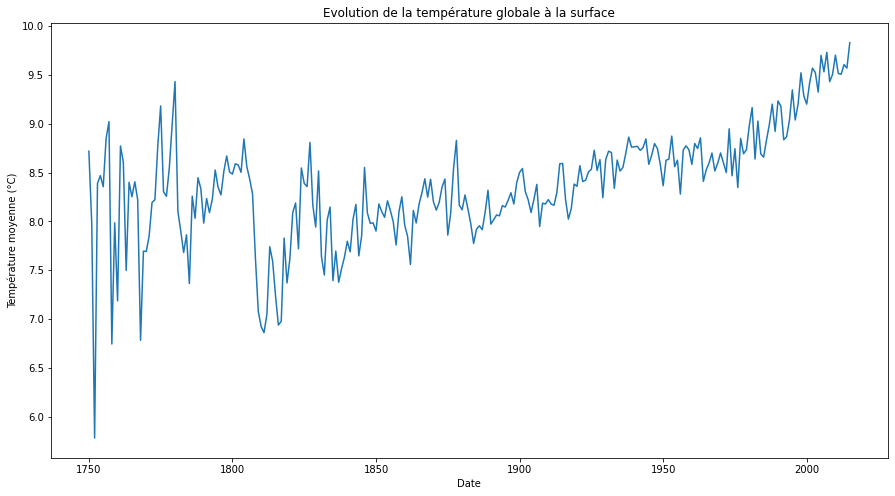

In [0]:
df = dataGlobalTemp.groupby('YEAR').mean()

plt.figure(figsize=(15, 8))
_ = plt.plot('LandAverageTemperature', data = df.iloc[:, :])
_ = plt.title('Evolution de la température globale à la surface')
_ = plt.xlabel('Date')
_ = plt.ylabel('Température moyenne (°C)')
_ = plt.xticks(np.arange(1850, 2025, step=5), rotation = 45, ha = "right")

### Masse des glaciers



Source : https://www.epa.gov/climate-indicators/climate-change-indicators-glaciers
___
Name: Climate Change Indicators in the United States

Web: http://www3.epa.gov/climatechange/images/indicator_downloads/glaciers_fig-1.csv

--

Name: World Glacier Monitoring Service (WGMS)

Web: http://wgms.ch/downloads/wgms_2013_gmbb12.pdf
___

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Database Population Mondial 1960-2018
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

glacier = pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/glaciers_fig-1.csv',sep=',', skiprows=[0,1,2,3,4,5])

print(glacier)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    Year  Mean cumulative mass balance  Number of observations
0   1945                         0.000                     NaN
1   1946                        -0.540                     1.0
2   1947                        -2.420                     1.0
3   1948                        -2.710                     1.0
4   1949                        -3.140                     4.0
..   ...                           ...                     ...
66  2011                       -25.620                    40.0
67  2012                       -26.284                    39.0
68  2013                       -27.142                    35.0
69  2014                       -27.940                    32.0
70  2015                       -29.102                    27.0

[71 rows x 3 columns]


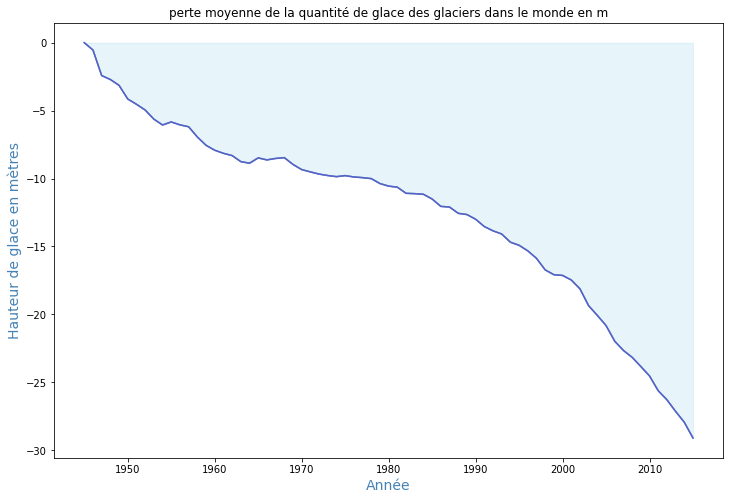

In [15]:
plt.figure(figsize=(12, 8))
axes = plt.axes()
#axes.grid()
x=glacier['Year']
y=glacier['Mean cumulative mass balance']
plt.plot(x, y)
plt.fill_between(x,y , color="skyblue", alpha=0.2)
plt.plot(x, y, color="Slateblue", alpha=0.8)
plt.xlabel("Année", {'fontsize':14, 'color':'steelblue'})
plt.ylabel("Hauteur de glace en mètres", {'fontsize':14, 'color':'steelblue'})

plt.figure
plt.title("perte moyenne de la quantité de glace des glaciers dans le monde en m")
plt.show()


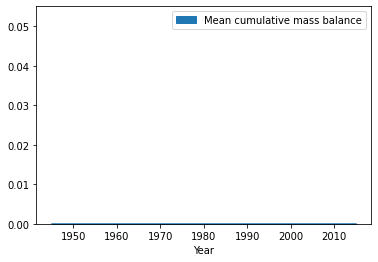

In [0]:
 df = pd.DataFrame( glacier['Mean cumulative mass balance'],glacier['Year'])
 df.plot.area()

### Sea levels



#### **1. *Data for 1883-present date compared to average of 1993-2008:***
___
Data is obtained from https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level  

The dataset is a mixture of data obtained from two sources:
1. [Research work by Church and White](https://link.springer.com/article/10.1007%2Fs10712-011-9119-1): 
They estimated the data of changes in sea level from 1880s to 2009.
2. [University of Hawaii Sea Level Center](http://uhslc.soest.hawaii.edu/data/?fd): 
Data after 2009, is obtained from UHSLC. It is based on a weighted average of 373 global tide gauge records collected by the U.S. National Ocean Service, UHSLC and partner agencies worldwide.  
The values in the dataset are change in sea level in millimeters compared to the 1993-2008 average(ie. Almost 20mm).  

This data can be viewed in **sealevel.csv** file


#### **2. *Data for Global mean sea level timeseries from 1993-2019:***
___
Data is obtained from the ftp server of The Commonwealth Scientific and Industrial Research Organisation (CSIRO): [CSIRO Data](ftp://ftp.csiro.au/legresy/gmsl_files)  
This data can be viewed in **CSIROsealevel.csv**
#### **3. *Other good sources of data:***
___
* [Sea level data by NASA](https://climate.nasa.gov/vital-signs/sea-level/) : This data source provides data of change in sea level in mm from 1993 to present date.


In [0]:
# Import csirosealevel.csv
downloaded = drive.CreateFile({'id': '1wnJKEI1bASumdRn96P3EzfII872RYwix'})
downloaded.GetContentFile('csirosealevel.csv')
dataCSIRO = pd.read_csv('csirosealevel.csv')

In [0]:
# Import sealevel.csv
downloaded = drive.CreateFile({'id': '1FE1IWOr3vKFgJ4lChV0TmSIk6unwZKyY'})
downloaded.GetContentFile('sealevel.csv')
dataSEA = pd.read_csv('sealevel.csv')